# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
# from scipy.stats import linregress
import datetime
import json
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

679

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count = 0
city_names = []
clouds = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
for city in cities:
    try:
        query = f"{base_url}appid={weather_api_key}&units={units}&q="
        response = requests.get(query + city).json()
        count = count + 1
        print(f"Processing Record {count} | {city}")
        country = response["sys"]["country"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        temp = 1.8*(response["main"]["temp_max"]) + 32
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = 2.236936*(response["wind"]["speed"])
        city_names.append(city)
        latitudes.append(latitude)
        longitudes.append(longitude)
        countries.append(country)
        dates.append(date)
        max_temps.append(temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        
    except KeyError:
        print("Couldn't locate data. Skipping city!")
           
weather_data = {"City": city_names,
                "Cloudiness": clouds,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": latitudes,
                "Lng": longitudes,
                "Max Temp": max_temps,
                "Wind Speeds": wind_speeds}
weather_reports = pd.DataFrame(weather_data)
weather_reports[["Max Temp", "Wind Speeds"]] = weather_reports[["Max Temp", "Wind Speeds"]].apply(pd.to_numeric)
weather_reports["Max Temp"] = weather_reports["Max Temp"].map("{:.2f}".format)
weather_reports["Wind Speeds"] = weather_reports["Wind Speeds"].map("{:.2f}".format)


Processing Record 1 | dickinson
Processing Record 2 | visavadar
Processing Record 3 | castro
Processing Record 4 | albany
Processing Record 5 | nikolskoye
Processing Record 6 | kaduqli
Processing Record 7 | dunmore town
Processing Record 8 | grand river south east
Couldn't locate data. Skipping city!
Processing Record 9 | guerrero negro
Processing Record 10 | kachhwa
Processing Record 11 | busselton
Processing Record 12 | atuona
Processing Record 13 | constitucion
Processing Record 14 | avarua
Processing Record 15 | nizhneyansk
Couldn't locate data. Skipping city!
Processing Record 16 | qaanaaq
Processing Record 17 | oktyabrskoye
Processing Record 18 | yellowknife
Processing Record 19 | chokurdakh
Processing Record 20 | hambantota
Processing Record 21 | broken hill
Processing Record 22 | puerto ayora
Processing Record 23 | lompoc
Processing Record 24 | half moon bay
Processing Record 25 | cape town
Processing Record 26 | tomatlan
Processing Record 27 | mar del plata
Processing Record 2

Processing Record 228 | dhidhdhoo
Processing Record 229 | thompson
Processing Record 230 | belushya guba
Couldn't locate data. Skipping city!
Processing Record 231 | portsoy
Processing Record 232 | tevaitoa
Processing Record 233 | alto araguaia
Processing Record 234 | akcakoca
Processing Record 235 | aklavik
Processing Record 236 | ancud
Processing Record 237 | hvolsvollur
Processing Record 238 | hasaki
Processing Record 239 | vaitupu
Couldn't locate data. Skipping city!
Processing Record 240 | victoria
Processing Record 241 | torbay
Processing Record 242 | konstantynow lodzki
Processing Record 243 | tuatapere
Processing Record 244 | sinnamary
Processing Record 245 | oyem
Processing Record 246 | salgar
Processing Record 247 | sayyan
Processing Record 248 | kaliua
Processing Record 249 | warqla
Couldn't locate data. Skipping city!
Processing Record 250 | tufulele
Couldn't locate data. Skipping city!
Processing Record 251 | yangjiang
Processing Record 252 | chuy
Processing Record 253 | a

Processing Record 451 | videira
Processing Record 452 | sao gabriel da cachoeira
Processing Record 453 | khormuj
Couldn't locate data. Skipping city!
Processing Record 454 | pombas
Processing Record 455 | lazaro cardenas
Processing Record 456 | flin flon
Processing Record 457 | salym
Processing Record 458 | itupiranga
Processing Record 459 | pacific grove
Processing Record 460 | okhotsk
Processing Record 461 | evensk
Processing Record 462 | paso de los toros
Processing Record 463 | nisia floresta
Processing Record 464 | kashan
Processing Record 465 | praia da vitoria
Processing Record 466 | manaure
Processing Record 467 | svetlyy
Processing Record 468 | okato
Processing Record 469 | san blas
Processing Record 470 | hrinova
Processing Record 471 | sorvag
Couldn't locate data. Skipping city!
Processing Record 472 | rach gia
Processing Record 473 | alihe
Processing Record 474 | tahta
Processing Record 475 | sitka
Processing Record 476 | kpalime
Processing Record 477 | magistralnyy
Process

Processing Record 675 | bol
Processing Record 676 | maniitsoq
Processing Record 677 | terrace
Processing Record 678 | konibodom
Processing Record 679 | mana


In [34]:
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,dickinson,40,US,1592259961,58,29.46,-95.05,90.00,16.11
1,visavadar,100,IN,1592260084,82,21.38,70.68,83.30,7.87
2,castro,29,BR,1592260084,95,-24.79,-50.01,55.40,5.99
3,albany,19,US,1592259885,28,42.60,-73.97,77.00,3.96
4,nikolskoye,78,RU,1592260085,72,59.70,30.79,68.00,2.51


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_reports.to_csv("weather_reports.csv")
weather_reports.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,dickinson,40,US,1592259961,58,29.46,-95.05,90.00,16.11
1,visavadar,100,IN,1592260084,82,21.38,70.68,83.30,7.87
2,castro,29,BR,1592260084,95,-24.79,-50.01,55.40,5.99
3,albany,19,US,1592259885,28,42.60,-73.97,77.00,3.96
4,nikolskoye,78,RU,1592260085,72,59.70,30.79,68.00,2.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

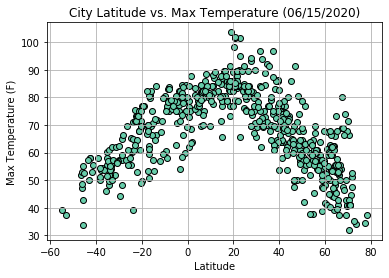

The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.


In [20]:
converted_dates = []
for date in dates:
    converted_date = datetime.datetime.fromtimestamp(date).strftime("%m/%d/%Y")
    converted_dates.append(converted_date)
    
weather_reports["Converted Date"] = converted_dates
weather_reports = weather_reports[["City", 
                                   "Cloudiness", 
                                   "Country", 
                                   "Date", 
                                   "Converted Date", 
                                   "Humidity", 
                                   "Lat", 
                                   "Lng", 
                                   "Max Temp", 
                                   "Wind Speeds"]]
plot_date = weather_reports.loc[0, "Converted Date"]
plt.scatter(weather_reports["Lat"], weather_data["Max Temp"], facecolor="#66CDAA", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.")

#### Latitude vs. Humidity Plot

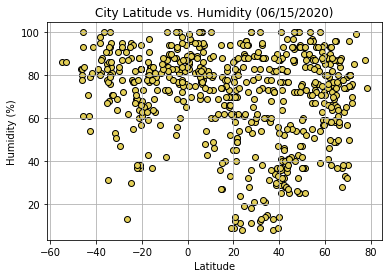

The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.


In [8]:
plt.scatter(weather_reports["Lat"], weather_data["Humidity"], facecolor="#E3CF57", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.")

#### Latitude vs. Cloudiness Plot

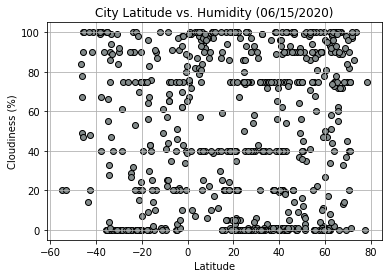

The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.


In [9]:
plt.scatter(weather_reports["Lat"], weather_data["Cloudiness"], facecolor="#838B8B", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.")

#### Latitude vs. Wind Speed Plot

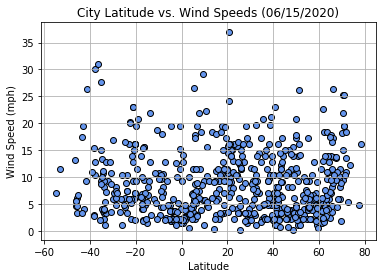

The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.


In [10]:
plt.scatter(weather_reports["Lat"], weather_data["Wind Speeds"], facecolor="#6495ED", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speeds ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.")

## Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames


# Northern DF
northern_df = weather_reports.loc[weather_reports["Lat"] > 0,:]
northern_df.head()


,City,Cloudiness,Country,Date,Converted Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
0,dickinson,40,US,1592259961,06/15/2020,58,29.46,-95.05,90.00,16.11
1,visavadar,100,IN,1592260084,06/15/2020,82,21.38,70.68,83.30,7.87
3,albany,19,US,1592259885,06/15/2020,28,42.60,-73.97,77.00,3.96
4,nikolskoye,78,RU,1592260085,06/15/2020,72,59.70,30.79,68.00,2.51
5,kaduqli,97,SD,1592260085,06/15/2020,49,11.02,29.72,84.16,4.52


In [24]:
# Southern DF
southern_df = weather_reports.loc[weather_reports["Lat"] < 0,:]
southern_df.head()

,City,Cloudiness,Country,Date,Converted Date,Humidity,Lat,Lng,Max Temp,Wind Speeds
2,castro,29,BR,1592260084,06/15/2020,95,-24.79,-50.01,55.40,5.99
9,busselton,99,AU,1592260085,06/15/2020,84,-33.65,115.33,55.00,5.41
10,atuona,1,PF,1592260085,06/15/2020,73,-9.80,-139.03,80.47,10.65
11,constitucion,100,CL,1592260086,06/15/2020,85,-35.33,-72.42,55.38,27.69
12,avarua,20,CK,1592260047,06/15/2020,64,-21.21,-159.78,75.20,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

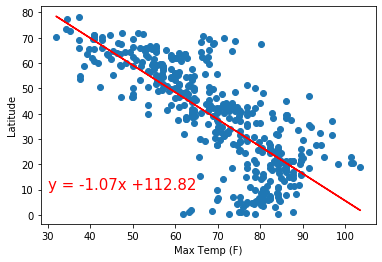

In [25]:
# Set X and Y vals
x_values = northern_df["Max Temp"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="red")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()





####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

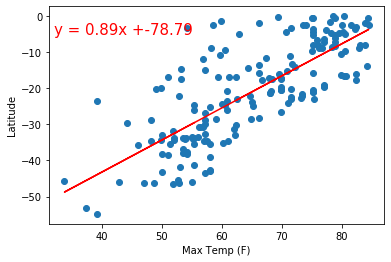

In [26]:
# Set X and Y vals
x_values = southern_df["Max Temp"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(32,-5),fontsize=15,color="red")

# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

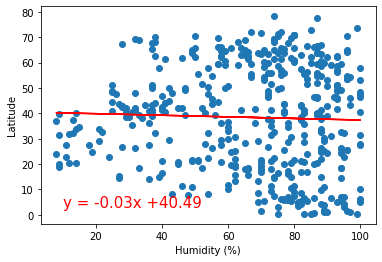

In [27]:
# Set X and Y vals
x_values = northern_df["Humidity"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,3),fontsize=15,color="red")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

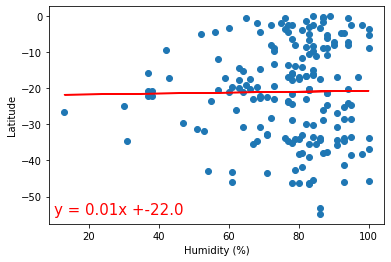

In [28]:
# Set X and Y vals
x_values = southern_df["Humidity"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(10,-55),fontsize=15,color="red")

# Make Labels
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

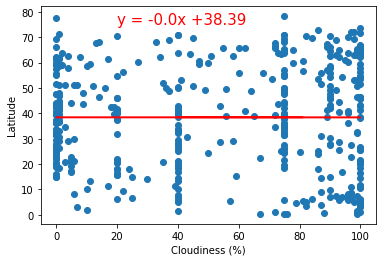

In [29]:
# Set X and Y vals
x_values = northern_df["Cloudiness"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,75),fontsize=15,color="red")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

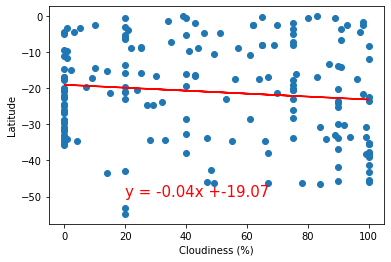

In [30]:
# Set X and Y vals
x_values = southern_df["Cloudiness"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")

# Make Labels
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

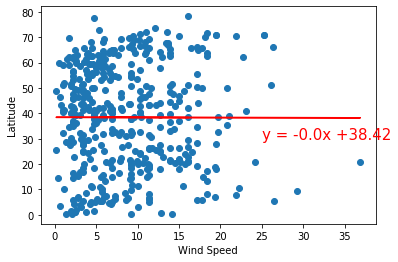

In [31]:
# Set X and Y vals
x_values = northern_df["Wind Speeds"].astype(float)
y_values = northern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(25,30),fontsize=15,color="red")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

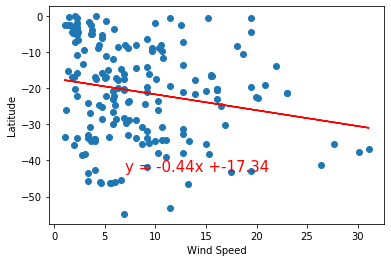

In [32]:
# Set X and Y vals
x_values = southern_df["Wind Speeds"].astype(float)
y_values = southern_df["Lat"].astype(float)

# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)

# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# To add the equation to your plot:
plt.annotate(line_eq,(7,-43),fontsize=15,color="red")

# Make Labels
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.show()